### Import required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')

### Import Dataset and EDA

In [2]:
df = pd.read_csv('winequality-red.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Visualize the Data

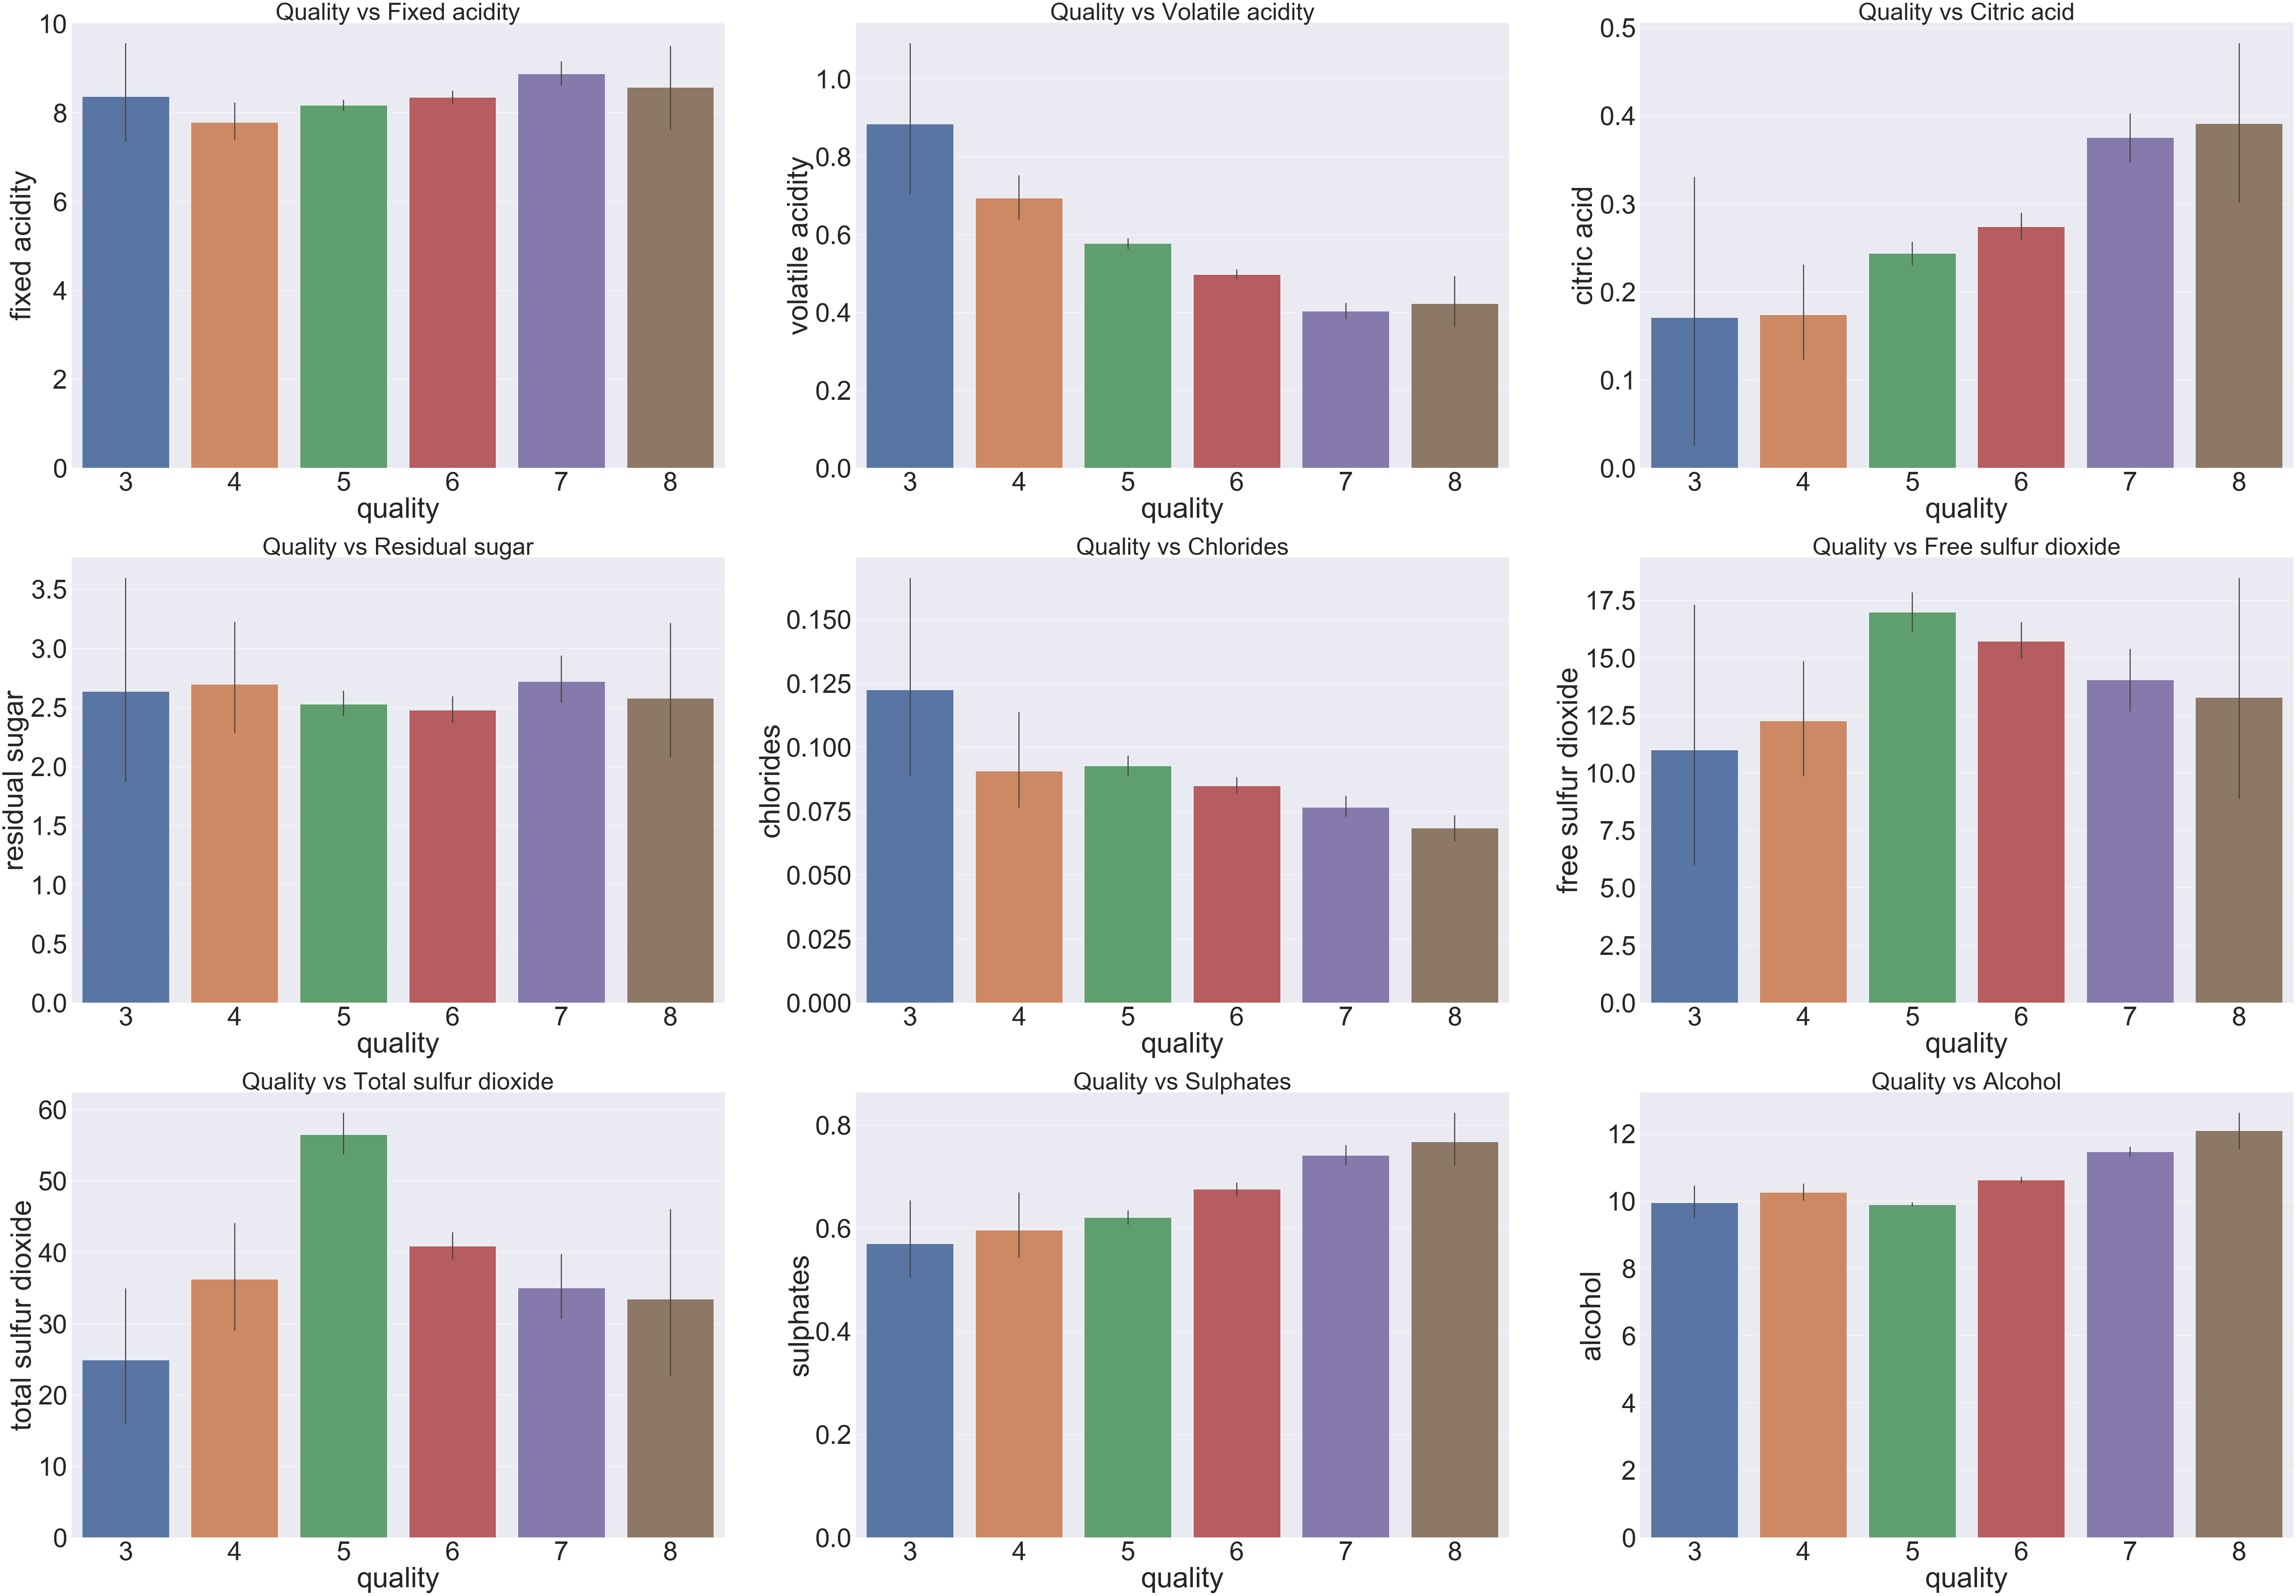

In [11]:
plt.figure(figsize=(100,70))
sns.set(font_scale=6)

plt.subplot(331)
plt.title("Quality vs Fixed acidity", fontsize=60)
sns.barplot(x = 'quality', y ='fixed acidity',  data = df)

plt.subplot(332)
plt.title("Quality vs Volatile acidity", fontsize=60)
sns.barplot(x = 'quality', y ='volatile acidity',  data = df)

plt.subplot(333)
plt.title("Quality vs Citric acid", fontsize=60)
sns.barplot(x = 'quality', y ='citric acid',  data = df)

plt.subplot(334)
plt.title("Quality vs Residual sugar", fontsize=60)
sns.barplot(x = 'quality', y ='residual sugar',  data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides", fontsize=60)
sns.barplot(x = 'quality', y ='chlorides',  data = df)

plt.subplot(336)
plt.title("Quality vs Free sulfur dioxide", fontsize=60)
sns.barplot(x = 'quality', y ='free sulfur dioxide',  data = df)

plt.subplot(337)
plt.title("Quality vs Total sulfur dioxide", fontsize=60)
sns.barplot(x = 'quality', y ='total sulfur dioxide',  data = df)
           
plt.subplot(338)
plt.title("Quality vs Sulphates", fontsize=60)
sns.barplot(x = 'quality', y ='sulphates',  data = df)

plt.subplot(339)
plt.title("Quality vs Alcohol", fontsize=60)
sns.barplot(x = 'quality', y ='alcohol',  data = df)


In [12]:
bins = (2, 6.5, 8)
groups = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = groups)

In [13]:
label_quality = LabelEncoder()

In [14]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [15]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

### 0 indicates Bad and 1 indicates Good

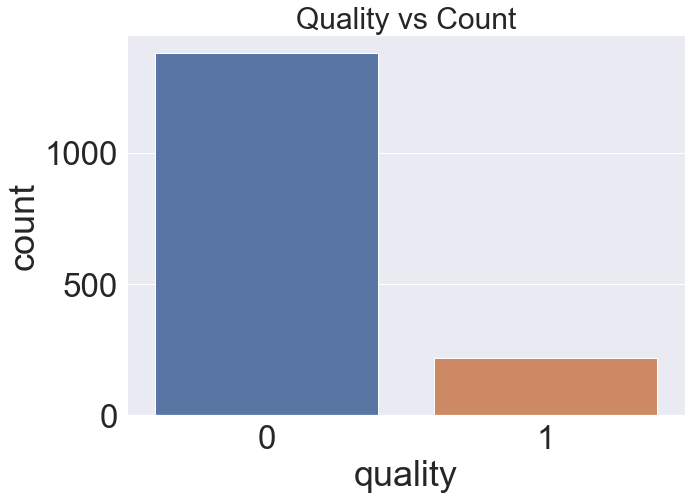

In [16]:
plt.figure(figsize=(10,7))
sns.set(font_scale=3)
plt.title("Quality vs Count", fontsize=30)
sns.countplot(df['quality'])

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [18]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Logistic Regression

In [22]:
LR =  LogisticRegression()
LR.fit(X_train, y_train)
print('Test accuracy:{}%'.format(round(LR.score(X_test, y_test)*100, 2)))

Test accuracy:87.5%


In [23]:
pred_LR = LR.predict(X_test)

In [25]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



# Support Vector Classifier

In [26]:
svc = SVC()
svc.fit(X_train, y_train)
print('Test accuracy:{}%'.format(round(svc.score(X_test, y_test)*100, 2)))

Test accuracy:87.5%


In [27]:
pred_svc = svc.predict(X_test)

In [28]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



# Random Forest Classifier

In [29]:
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(X_train, y_train)
print('Test accuracy:{}%'.format(round(RFC.score(X_test, y_test)*100, 2)))

Test accuracy:88.12%


In [30]:
pred_RFC = RFC.predict(X_test)

In [31]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.67      0.38      0.49        47

    accuracy                           0.88       320
   macro avg       0.78      0.68      0.71       320
weighted avg       0.87      0.88      0.87       320



In [32]:
print(confusion_matrix(y_test, pred_RFC))

[[264   9]
 [ 29  18]]


## Cross validation of models

In [34]:
from sklearn.model_selection import cross_val_score
scr1 = cross_val_score(LR, X, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr1.mean())

Cross validation score of Logistic Regression model: 0.869294670846395


In [35]:
scr2 = cross_val_score(svc, X, y, cv=5)
print("Cross validation score of Support Vector Classifier model:", scr2.mean())

Cross validation score of Support Vector Classifier model: 0.8642907523510971


In [36]:
scr3 = cross_val_score(RFC, X, y, cv=5)
print("Cross validation score of Random Forest Classifier model:", scr3.mean())

Cross validation score of Random Forest Classifier model: 0.8705466300940439


In [37]:
# Saving the model

import joblib
joblib.dump(RFC, "Red_Wine_Quality.pkl")

['Red_Wine_Quality.pkl']